In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import time

In [48]:
# Sigmoid Fonksiyonu
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [67]:
# Maliyet Fonksiyonu (Cost Function)
def compute_cost(X, y, W, epsilon=1e-10):
    Z = np.dot(X, W)
    y_pred = sigmoid(Z)
    # Epsilon kullanarak hatayı önleme
    cost = -1 * np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
    return cost

In [68]:
# Gradient Descent Algoritması
def gradient_descent(X, y, W, learning_rate=0.001, n_steps=5000):
    m = X.shape[0]
    cost_history = []
    for i in range(n_steps):
        Z = np.dot(X, W)
        y_pred = sigmoid(Z)
        gradient = np.dot(X.T, (y_pred - y)) / m
        W -= learning_rate * gradient

        cost = compute_cost(X, y, W)
        cost_history.append(cost)

        if i % 500 == 0:
            print(f"İterasyon {i} - Maliyet: {cost}")

    return W, cost_history

In [69]:
# Model Değerlendirme Fonksiyonu
def evaluate_model(y_true, y_pred, training_time, prediction_time):
    accuracy = np.mean(y_pred == y_true.values.reshape(-1, 1))
    print(f"\nModel Accuracy: {accuracy:.4f}")
    print(f"Eğitim Süresi: {training_time:.4f} saniye")
    print(f"Tahmin Süresi: {prediction_time:.4f} saniye")

    print("\nKarmaşıklık Matrisi:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    print("\nSınıflandırma Raporu:")
    print(classification_report(y_true, y_pred))

    # Maliyet Grafiği
    plt.figure(figsize=(8, 6))
    plt.plot(cost_history)
    plt.title("Maliyet Azalma Grafiği (Cost Reduction)")
    plt.xlabel("İterasyon")
    plt.ylabel("Maliyet")
    plt.show()

    # Karmaşıklık Matrisi Görselleştirme
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, cmap="Blues", interpolation="nearest")
    plt.title("Karmaşıklık Matrisi")
    plt.xlabel("Tahmin Edilen")
    plt.ylabel("Gerçek")
    plt.colorbar()
    plt.show()

In [70]:
# Veri Yükleme ve İnceleme
df = pd.read_csv('heart.csv')

In [71]:
# Veri Seti Bilgisi ve İlk 5 Satır
print("Veri Seti Bilgisi:")
print(df.info())
print("\nİlk 5 Satır:")
print(df.head())

Veri Seti Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

İlk 5 Satır:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0 

In [72]:
# Eksik Veri Kontrolü
print("\nEksik Veri Sayısı:")
print(df.isnull().sum())


Eksik Veri Sayısı:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [73]:
# Hedef Değişkenin Kontrolü
print("\nHedef Değişken (target) Değer Dağılımı:")
print(df['target'].value_counts())


Hedef Değişken (target) Değer Dağılımı:
target
1    526
0    499
Name: count, dtype: int64


In [74]:
# Eğitim ve Test Verilerini Hazırlama
X = df.drop(columns=["target"])
y = df["target"]

In [75]:
# Eğitim ve Test Bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [76]:
# Bias Ekleme
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [77]:
# Ağırlıkların Başlatılması
weights_initial = np.random.randn(X_train_bias.shape[1], 1) * 0.01

In [78]:
# Eğitim Süresi Ölçümü
start_time = time.time()
weights_final, cost_history = gradient_descent(X_train_bias, y_train.values.reshape(-1, 1), weights_initial)
training_time = time.time() - start_time

İterasyon 0 - Maliyet: 11.821807767392151
İterasyon 500 - Maliyet: 5.535016130519136
İterasyon 1000 - Maliyet: 5.433006524034606
İterasyon 1500 - Maliyet: 5.40044478737039
İterasyon 2000 - Maliyet: 5.369043152506821
İterasyon 2500 - Maliyet: 5.338445776760542
İterasyon 3000 - Maliyet: 5.308780928805472
İterasyon 3500 - Maliyet: 5.279980236470674
İterasyon 4000 - Maliyet: 5.2519461588702
İterasyon 4500 - Maliyet: 5.22463407838731


In [79]:
# Tahmin Süresi Ölçümü
start_time = time.time()
y_pred_probs = sigmoid(np.dot(X_test_bias, weights_final))
y_preds = (y_pred_probs > 0.5).astype(int)
prediction_time = time.time() - start_time


Model Accuracy: 0.5902
Eğitim Süresi: 0.2579 saniye
Tahmin Süresi: 0.0000 saniye

Karmaşıklık Matrisi:
[[23 77]
 [ 7 98]]

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.77      0.23      0.35       100
           1       0.56      0.93      0.70       105

    accuracy                           0.59       205
   macro avg       0.66      0.58      0.53       205
weighted avg       0.66      0.59      0.53       205



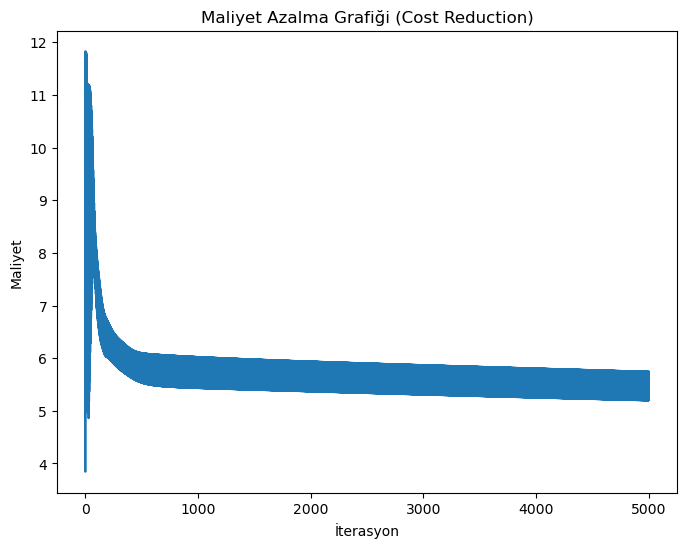

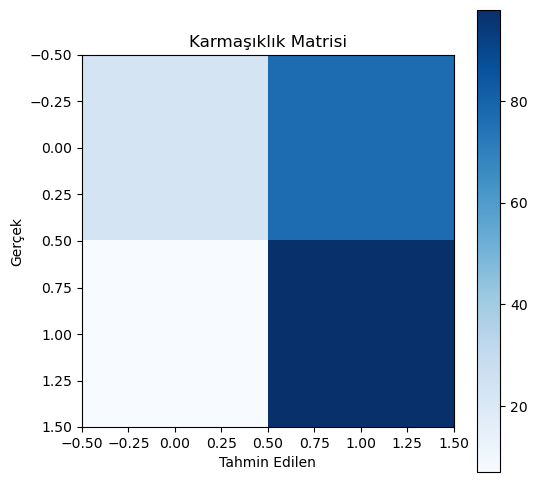

In [80]:
# Model Değerlendirme
evaluate_model(y_test, y_preds, training_time, prediction_time)
